Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.

Cost at initial theta (zeros): [0.69314718]

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at test theta: [0.21833019]
Expected cost (approx): 0.218

Gradient at test theta: 

[[0.04290299]
 [2.56623412]
 [2.64679737]]

Expected gradients (approx):
 0.043
 2.566
 2.647

For a student with scores 45 and 85, we predict an admission probability of  [0.77629159]

Expected value: 0.775 +/- 0.002


Train Accuracy: 89.0
Expected accuracy (approx): 89.0





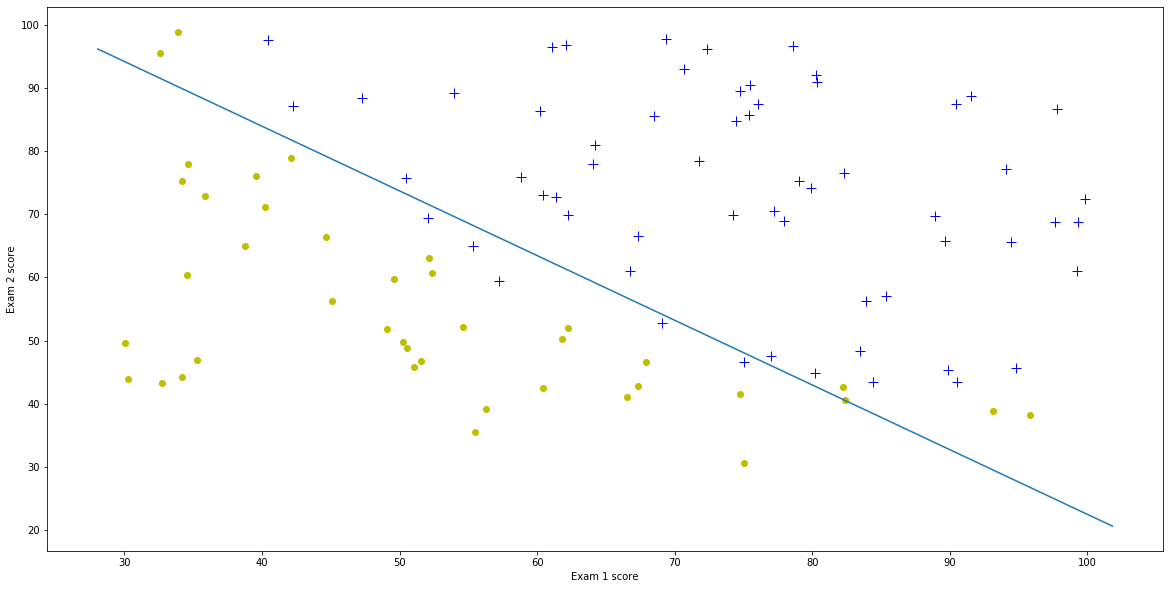

In [114]:
%matplotlib inline
import scipy.optimize as op
from mpl_toolkits import mplot3d
import scipy.ndimage
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

def sigmoid(z):
    g = np.zeros((z.shape[0],1))
    g=1/(1+np.exp(-z))
    return g

def costfunc(theta, X, y, lambda1):
    m,n = X.shape; 
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    J = -((np.sum(y*np.log(sigmoid(np.dot(X,theta))) + (1 - y)*np.log(1-sigmoid(np.dot(X,theta)))))/m)+((np.sum(theta**2)-theta[0]**2)*(lambda1/(2*m)))
    return J

def gradient(theta, X, y, lambda1):
    m , n = X.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1))
    temp = ((X.T).dot(sigmoid(X.dot(theta))-y))/m
    grad = (np.dot((X.T),(sigmoid(np.dot(X,theta))-y))/m)+(theta*(lambda1/m))
    grad[0]=temp[0]
    return grad

data = np.loadtxt("ex2data1.txt", delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')

pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos, 0], X[pos, 1], 'b+', markersize=10)
plt.plot(X[neg, 0], X[neg, 1], 'yo', markersize=6)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

[m, n] = X.shape
X = np.concatenate((np.ones((m,1)),X),axis=1)

initial_theta = np.zeros(n+1)
J=costfunc(initial_theta, X, y, 0)
grad=gradient(initial_theta, X, y, 0)

print('Cost at initial theta (zeros):', J)
print('\nExpected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(grad)
print('\nExpected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

test_theta = np.array([-24, 0.2, 0.2])
J=costfunc(test_theta, X, y, 0)
grad=gradient(test_theta, X, y, 0)

print('Cost at test theta:', J)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(grad)
print('\nExpected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

res=op.minimize(fun=costfunc, x0=(0, 0, 0), args=(X,y,0), method='Nelder-Mead')
theta=res['x']
J=res['fun']

if X.shape[1] <= 3:
    plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
    plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
    plt.plot(plot_x, plot_y)
else:
    u = np.linspace(-1, 1.5, 50).reshape(-1,1)
    v = np.linspace(-1, 1.5, 50).reshape(-1,1)

    z = np.zeros((len(u), len(v)))
    for i in range(1,len(u)):
        for j in range(1,len(v)):
            degree = 6
            out = np.ones((1,1)).reshape(-1,1)
            for k in range(1,degree+1):
                for l in range(0,k+1):
                    out= np.concatenate((out, ((u[i].reshape(-1,1)**(k-l))*(v[j].reshape(-1,1)**l))), axis=1)
            z[i,j] = np.dot(out,theta)
    z = z.T
    u,v=np.meshgrid(u,v)
    plt.contour(u, v, z, levels=[0])
            
prob = sigmoid(np.dot(theta.T, np.array([1, 45, 85]).reshape(-1,1)))
print('For a student with scores 45 and 85, we predict an admission probability of ', prob)
print('\nExpected value: 0.775 +/- 0.002\n\n')

p = np.zeros(m)
h=np.dot(X,theta)
for i in range(0, m):
  if (sigmoid(h))[i]>=0.5:
    p[i]=1
p=(p==y)*1
print('Train Accuracy:', np.mean(p) * 100)
print('Expected accuracy (approx): 89.0\n')
print('\n')

Cost at initial theta (zeros):  [0.69314718]
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]

Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): [3.16450933]
Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]

Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



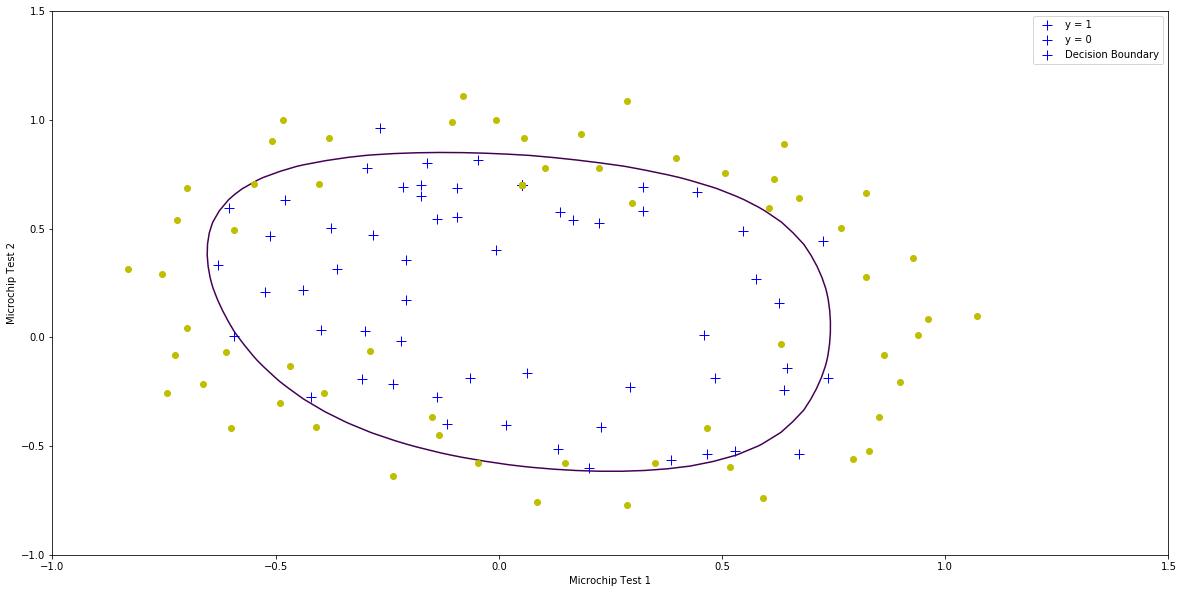

Train Accuracy: 83.05084745762711
Expected accuracy (with lambda = 1): 83.1 (approx)



In [117]:
dat = np.loadtxt("ex2data2.txt", delimiter=',')
X = dat[:, 0:2]
y = dat[:, 2].reshape(-1,1)

pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos, 0], X[pos, 1], 'b+', markersize=10)
plt.plot(X[neg, 0], X[neg, 1], 'yo', markersize=6)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

X1=X[:,0].reshape(-1,1)
X2=X[:,1].reshape(-1,1)
degree = 6
out = np.ones((X1[:,0]).shape[0]).reshape(-1,1)
for i in range(1,degree+1):
    for j in range(0, i+1):
        out= np.concatenate((out, np.multiply((X1**(i-j)),(X2**j))), axis=1)
X=out
        
initial_theta = np.zeros((X.shape[1], 1))
lambda1=1
m=y.shape[0]

J=costfunc(initial_theta, X, y, lambda1)
grad=gradient(initial_theta, X, y, lambda1)
       
print('Cost at initial theta (zeros): ', J)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(grad[0:5 :,])
print('\nExpected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

test_theta = np.ones((X.shape[1],1))
lambda1=10
J=costfunc(test_theta, X, y, lambda1)
grad=gradient(test_theta, X, y, lambda1)

print('\nCost at test theta (with lambda = 10):', J)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print(grad[0:5 :,])
print('\nExpected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

initial_theta = np.zeros((X.shape[1], 1))
lambda1= 1

res=op.minimize(fun=costfunc, x0=initial_theta, args=(X,y,lambda1), method='bfgs')
theta=res['x'].reshape(-1,1)
J=res['fun']

if X.shape[1] <= 3:
    plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
    plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
    plt.plot(plot_x, plot_y)
else:
    u = np.linspace(-1, 1.5, 50).reshape(-1,1)
    v = np.linspace(-1, 1.5, 50).reshape(-1,1)

    z = np.zeros((len(u), len(v)))
    for i in range(1,len(u)):
        for j in range(1,len(v)):
            degree = 6
            out = np.ones((1,1)).reshape(-1,1)
            for k in range(1,degree+1):
                for l in range(0,k+1):
                    out= np.concatenate((out, ((u[i].reshape(-1,1)**(k-l))*(v[j].reshape(-1,1)**l))), axis=1)
            z[i,j] = np.dot(out,theta)
    z = z.T
    u,v=np.meshgrid(u,v)
    plt.contour(u, v, z, levels=[0])

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(["y = 1", "y = 0", "Decision Boundary"])
plt.show()

p = np.zeros(m).reshape(-1,1)
h=np.dot(X,theta)
for i in range(0, m):
  if (sigmoid(h))[i]>=0.5:
    p[i]=1
p=(p==y)*1
print('Train Accuracy:', np.mean(p) * 100)
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')